In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
url='http://bit.ly/w-data' 
df=pd.read_csv(url, encoding='UTF-8')

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
correlation= df.corr(method='pearson')
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


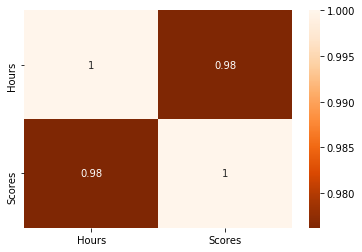

In [5]:
sns.heatmap(correlation, annot=True, cmap='Oranges_r')

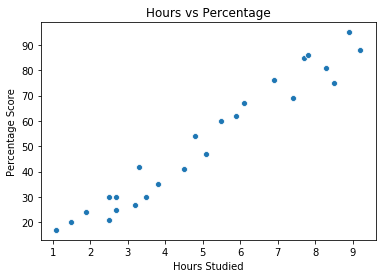

In [6]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

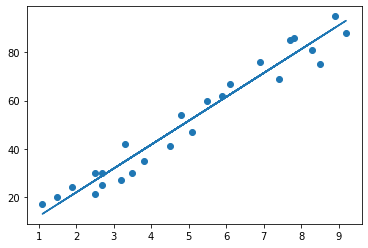

In [12]:
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [13]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:

y_pred=regressor.predict(X_test)

In [15]:
df_Compared = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Compared

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


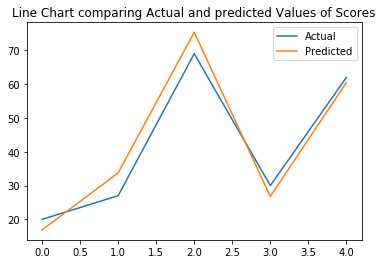

In [16]:
df_Compared.Actual.plot()
df_Compared.Predicted.plot()
plt.title('Line Chart comparing Actual and predicted Values of Scores')
plt.legend()

Text(0.5, 1.0, 'Bar plot comparing Actual and predicted Values of Scores')

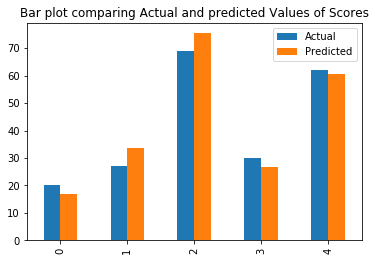

In [17]:
df_Compared.plot(kind='bar')
plt.title('Bar plot comparing Actual and predicted Values of Scores')

In [18]:
from sklearn import metrics

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
r2: 0.9454906892105356


#Finally Our model prediction is completed, and its accuracy is 94.55% which is quite good.